# Exploratory Data Analysis - Indian Premier League

### We have the Indian Premier League data from 2008 to 2020. We have two files to begin with. matches.csv - giving us details of each match played. deliveries.csv - all the deliveries in all the matches put together. We would work on these two files to extract data on each match, batsmen and bowlers.

## First we work on deliveries.csv file 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

divr_df=pd.read_csv(r'C:\Users\hp\First1\Project\IPL\IPL 2008-2019\deliveries.csv')
divr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Checking Null Values

In [149]:
divr_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [150]:
divr_df.shape

(179078, 21)

In [151]:
divr_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

# Replacing the Team Names with their abbreviations

In [152]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
    'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
    'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
    'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
    'Rising Pune Supergiants':'RPS'
}

In [153]:
divr_df['batting_team']=divr_df['batting_team'].map(Teams)
divr_df['bowling_team']=divr_df['bowling_team'].map(Teams)

In [154]:
divr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Score Distribution For Teams by Innings

In [155]:
runs=divr_df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index().sort_values(by='total_runs', ascending=False)
runs.drop('match_id',axis=1,inplace=True)

In [156]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]
inning1

,inning,batting_team,total_runs
829,1,RCB,263
1370,1,KKR,250
1250,1,RCB,248
416,1,CSK,246
1485,1,KKR,241
...,...,...,...
949,1,RCB,70
198,1,KKR,67
70,1,DD,67
1489,1,RCB,65


In [157]:
inning2

,inning,batting_team,total_runs
417,2,RR,223
101,2,MI,223
1371,2,KXIP,221
1433,2,KKR,219
1465,2,KKR,219
...,...,...,...
53,2,RCB,49
115,2,KKR,48
988,2,SRH,44
1490,2,RR,42


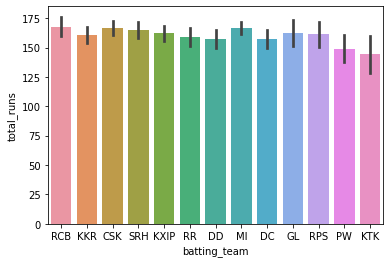

In [158]:
#In inning 1
sns.barplot(x='batting_team',y='total_runs',data=inning1)

### According to this plot, the batting by MI & RCB seems best. 

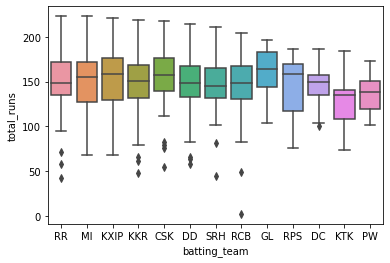

In [159]:
#In inning 2
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

### In this, we see a point near 0 for RCB which may seem to be outlier. But it is on account of the match was disrupted.

# How many times teams scores more than 200

In [160]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1455,11326,2,KKR,RCB,219
1464,11333,1,RCB,KXIP,213
1472,11338,1,KKR,MI,241
1473,11338,2,MI,KKR,204


### In 104 matches out of 642 the score goes more than 200

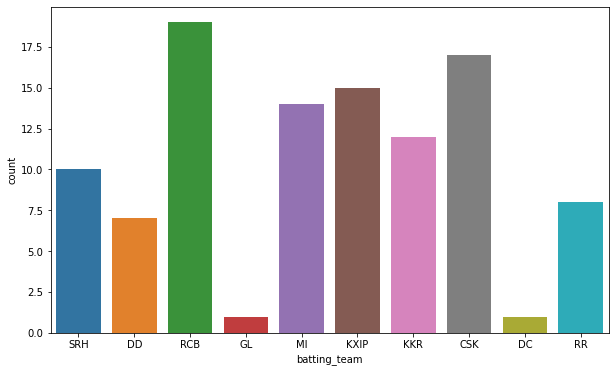

In [161]:
plt.figure(figsize=(10,6))
sns.countplot(score_200['batting_team'])

### Graph shows the number of times a team has scored above 200 runs. RCB leads the chart followed by CSK

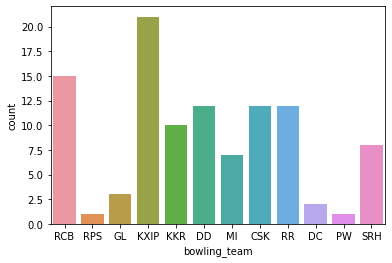

In [162]:
sns.countplot(score_200['bowling_team'])

### Graph shows the number of times a bowling team has scored above 200 runs.

# Top 10 Batsman

# Total Runs Scored by players

In [163]:
total_runs=divr_df.groupby(['batsman'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False)
total_runs.columns=['batsman','runs']
total_runs

,batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
...,...,...
172,IC Pandey,0
182,J Denly,0
326,P Raj,0
463,Sunny Gupta,0


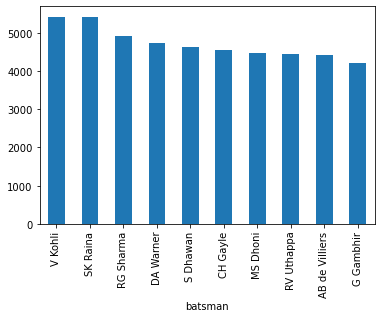

In [164]:
max_runs=divr_df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

### Virat Kohli and Suresh Raina leads the chart 

# Total Fours hit by players

In [165]:
four=divr_df[divr_df['batsman_runs']==4]

In [166]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index().sort_values(by='batsman_runs', ascending=False)
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
317,S Dhawan,526
343,SK Raina,495
120,G Gambhir,492
387,V Kohli,482
89,DA Warner,459
...,...,...
368,Sandeep Sharma,1
322,S Mavi,1
371,Shivam Sharma,1
254,NS Naik,1


# Total Sixes hit by players

In [167]:
sixes=divr_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False)
sixes.columns=['batsman','6s']
sixes

,batsman,6s
92,CH Gayle,327
26,AB de Villiers,214
290,MS Dhoni,207
428,SK Raina,195
367,RG Sharma,194
...,...,...
143,F Behardien,0
138,DT Patil,0
136,DS Lehmann,0
363,RD Chahar,0


# Top indivisual Scores

In [168]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)
max.columns=['batsman','max_runs']
max

,batsman,max_runs
2,CH Gayle,175
1,BB McCullum,158
0,AB de Villiers,133
5,RR Pant,130
4,M Vijay,127
3,DA Warner,126
7,V Sehwag,122
6,SR Watson,121


### Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

# Highest Wicket Taker

In [169]:
divr_df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [170]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [171]:
hwt=divr_df[divr_df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


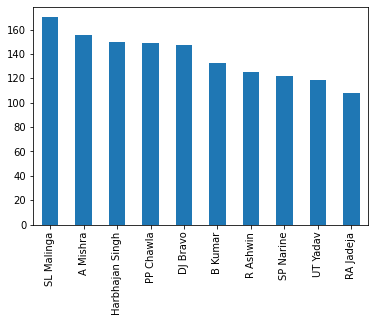

In [172]:
hwt['bowler'].value_counts()[:10].plot.bar()

### SL Malinga leads the chart

# Most lucky grounds for teams

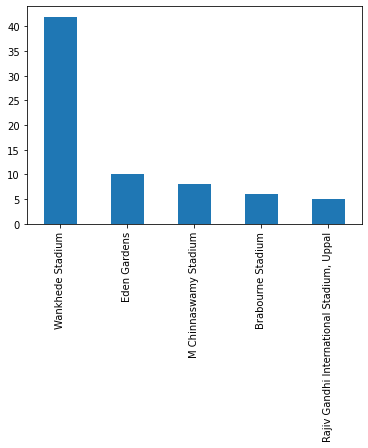

In [173]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)
lucky(df,'Mumbai Indians').plot(kind='bar')

### For Mumbai Indians

# Now taking the matches.csv file 

In [174]:
df=pd.read_csv(r'C:\Users\hp\First1\Project\IPL\IPL 2008-2019\matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [175]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Some Basic Analysis

In [176]:
print('Total Matches Played:',df.shape[0])   

Total Matches Played: 756


# Count of Player of the matches

In [177]:
print(df['player_of_match'].value_counts())

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
DL Vettori         1
MS Gony            1
J Archer           1
A Joseph           1
S Sreesanth        1
Name: player_of_match, Length: 226, dtype: int64


# Maximum win by runs

In [178]:
df[df['win_by_runs']==df['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


### Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference of 146

# Highest wins by wickets

In [179]:
df[df['win_by_wickets']==df['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


### In 11 matches team defeated the opponent by 10 wickets

# Maximum Toss Winners

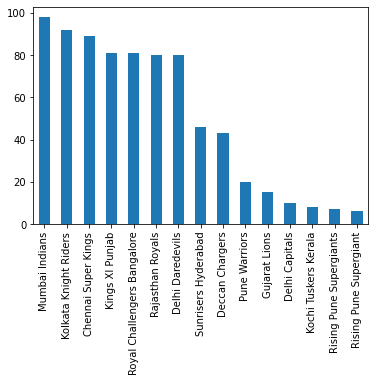

In [180]:
df['toss_winner'].value_counts().plot.bar()

### Highest Toss winner is MI

# Total Number of matches played

In [181]:
matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)

In [182]:
teams=(matches_played_byteams['team1'].value_counts() + matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,Chennai Super Kings,164
1,Deccan Chargers,75
2,Delhi Capitals,16
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,176
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,178
8,Mumbai Indians,187
9,Pune Warriors,46


# Number of wins 

In [183]:
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


### MI wins the highest number of matches followed by CSK

# Comparison of number of wins with total number of matches played

In [184]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [185]:
trace1 = go.Bar(
    x=player['team'],
    y=player['matches_played'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=player.team,
    y=player['wins'],
    name='Matches Won'
)

In [186]:
data = [trace1, trace2]
py.iplot(data)

### MI has won highest number of matches but CSK has the high probability of winning a match